## Script for loading observed overcontact light curves from JSON files
In this script we will load all JSON files that contain details about binary systems.
Content:
* Enviroment setup
* Loading of specific binary systems from JSON files
* Data preparation

In each cell where we load binary systems, we:
* open JSON file
* create place in dataframe for new records and load details

## 1. Enviroment setup
* Loading libraries

In [1]:
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
from r_eq_calculator import calculate_requivalent_radii

## 2. Loading of JSON files
* In next cells we will load specific JSON files individually into one dataframe

In [2]:
f1=open("AH Aur.json")
d1=json.load(f1)
x1=d1["system_parameters"]
v1=(d1["interpolated_light_curves"]["V"])
b1=(d1["interpolated_light_curves"]["B"])
f1.close()
x1

{'q': 0.169,
 'inc': 75.46,
 'omega1': 2.08,
 'omega2': 2.08,
 'T1': 6215.0,
 'T2': 6141.0,
 'P': 0.49410834,
 'Type': 'overcontact',
 'Spot': 'N',
 'Ref': 'http://liber.onu.edu.ua/pdf/astro/all/OAP_14/000_pdf/vanko.pdf'}

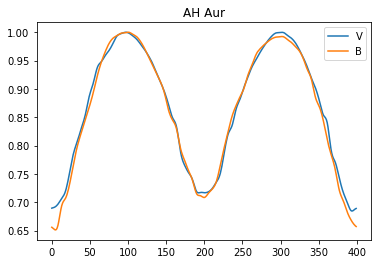

In [3]:
plt.plot(v1, label="V")
plt.plot(b1, label="B")
plt.legend()
plt.title("AH Aur")
plt.show()

In [4]:
df=pd.DataFrame([x1]*2, index=[0,1])
df["name"]=["AH Aur"]*2
df["filter"]=["V", "B"]
df["curve"]=[v1,b1]
df

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve
0,0.169,75.46,2.08,2.08,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925..."
1,0.169,75.46,2.08,2.08,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513..."


In [5]:
f2=open("AKHer.json")
d2=json.load(f2)
x2=d2["system_parameters"]
df=df.append([x2]*4, ignore_index=True)
df.loc[[2,3,4,5],["name"]]="AKHer"
df.loc[[2,3,4,5],["filter"]]=["V", "I", "R", "B"]
df.at[2,"curve"]=d2["interpolated_light_curves"]["V"]
df.at[3,"curve"]=d2["interpolated_light_curves"]["I"]
df.at[4,"curve"]=d2["interpolated_light_curves"]["R"]
df.at[5,"curve"]=d2["interpolated_light_curves"]["B"]
f2.close()

In [6]:
f3=open("ASCrB.json")
d3=json.load(f3)
x3=d3["system_parameters"]
df=df.append([x3]*4, ignore_index=True)
df.loc[[6,7,8,9],["name"]]="ASCrB"
df.loc[[6,7,8,9],["filter"]]=["V", "I", "R", "B"]
df.at[6,"curve"]=d3["interpolated_light_curves"]["V"]
df.at[7,"curve"]=d3["interpolated_light_curves"]["I"]
df.at[8,"curve"]=d3["interpolated_light_curves"]["R"]
df.at[9,"curve"]=d3["interpolated_light_curves"]["B"]
f3.close()

In [7]:
f5=open("BHCas.json")
d5=json.load(f5)
x5=d5["system_parameters"]
df=df.append([x5]*4, ignore_index=True)
df.loc[[10,11,12,13],["name"]]="BHCas"
df.loc[[10,11,12,13],["filter"]]=["V", "I", "R", "B"]
df.at[10,"curve"]=d5["interpolated_light_curves"]["V"]
df.at[11,"curve"]=d5["interpolated_light_curves"]["I"]
df.at[12,"curve"]=d5["interpolated_light_curves"]["R"]
df.at[13,"curve"]=d5["interpolated_light_curves"]["B"]
f5.close()

In [8]:
f6=open("BQAri.json")
d6=json.load(f6)
x6=d6["system_parameters"]
df=df.append([x6]*2, ignore_index=True)
df.loc[[14,15],["name"]]="BQAri"
df.loc[[14,15],["filter"]]=["V", "R"]
df.at[14,"curve"]=d6["interpolated_light_curves"]["V"]
df.at[15,"curve"]=d6["interpolated_light_curves"]["R"]
f6.close()

In [9]:
f7=open("BXDra.json")
d7=json.load(f7)
x7=d7["system_parameters"]
df=df.append([x7]*3, ignore_index=True)
df.loc[[16,17,18],["name"]]="BXDra"
df.loc[[16,17,18],["filter"]]=["V", "R", "B"]
df.at[16,"curve"]=d7["interpolated_light_curves"]["V"]
df.at[17,"curve"]=d7["interpolated_light_curves"]["R"]
df.at[18,"curve"]=d7["interpolated_light_curves"]["B"]
f7.close()

In [10]:
f8=open("GSC 0763-0572.json")
d8=json.load(f8)
x8=d8["system_parameters"]
df=df.append([x8]*3, ignore_index=True)
df.loc[[19,20,21],["name"]]="GSC 0763-0572"
df.loc[[19,20,21],["filter"]]=["V", "I", "R"]
df.at[19,"curve"]=d8["interpolated_light_curves"]["V"]
df.at[20,"curve"]=d8["interpolated_light_curves"]["I"]
df.at[21,"curve"]=d8["interpolated_light_curves"]["R"]
f8.close()

In [11]:
f9=open("HIDra.json")
d9=json.load(f9)
x9=d9["system_parameters"]
df=df.append([x9]*4, ignore_index=True)
df.loc[[22,23,24,25],["name"]]="HIDra"
df.loc[[22,23,24,25],["filter"]]=["V", "I", "R", "B"]
df.at[22,"curve"]=d9["interpolated_light_curves"]["V"]
df.at[23,"curve"]=d9["interpolated_light_curves"]["I"]
df.at[24,"curve"]=d9["interpolated_light_curves"]["R"]
df.at[25,"curve"]=d9["interpolated_light_curves"]["B"]
f9.close()

In [12]:
f10=open("UVLyn.json")
d10=json.load(f10)
x10=d10["system_parameters"]
df=df.append([x10]*2, ignore_index=True)
df.loc[[26,27],["name"]]="UVLyn"
df.loc[[26,27],["filter"]]=["V", "B"]
df.at[26,"curve"]=d10["interpolated_light_curves"]["V"]
df.at[27,"curve"]=d10["interpolated_light_curves"]["B"]
f10.close()

In [13]:
f11=open("V1128Tau.json")
d11=json.load(f11)
x11=d11["system_parameters"]
df=df.append([x11]*3, ignore_index=True)
df.loc[[28,29,30],["name"]]="V1128Tau"
df.loc[[28,29,30],["filter"]]=["V", "R", "B"]
df.at[28,"curve"]=d11["interpolated_light_curves"]["V"]
df.at[29,"curve"]=d11["interpolated_light_curves"]["R"]
df.at[30,"curve"]=d11["interpolated_light_curves"]["B"]
f11.close()

In [14]:
f12=open("V2612Oph.json")
d12=json.load(f12)
x12=d12["system_parameters"]
df=df.append([x12]*4, ignore_index=True)
df.loc[[31,32,33,34],["name"]]="V2612Oph"
df.loc[[31,32,33,34],["filter"]]=["V", "I", "R", "B"]
df.at[31,"curve"]=d12["interpolated_light_curves"]["V"]
df.at[32,"curve"]=d12["interpolated_light_curves"]["I"]
df.at[33,"curve"]=d12["interpolated_light_curves"]["R"]
df.at[34,"curve"]=d12["interpolated_light_curves"]["B"]
f12.close()

In [15]:
f13=open("V2790Ori.json")
d13=json.load(f13)
x13=d13["system_parameters"]
df=df.append([x13]*3, ignore_index=True)
df.loc[[35,36,37],["name"]]="V2790Ori"
df.loc[[35,36,37],["filter"]]=["V", "R", "B"]
df.at[35,"curve"]=d13["interpolated_light_curves"]["V"]
df.at[36,"curve"]=d13["interpolated_light_curves"]["R"]
df.at[37,"curve"]=d13["interpolated_light_curves"]["B"]
f13.close()

In [16]:
f14=open("V396Mon.json")
d14=json.load(f14)
x14=d14["system_parameters"]
df=df.append([x14]*2, ignore_index=True)
df.loc[[38,39],["name"]]="V369Mon"
df.loc[[38,39],["filter"]]=["V", "B"]
df.at[38,"curve"]=d14["interpolated_light_curves"]["V"]
df.at[39,"curve"]=d14["interpolated_light_curves"]["B"]
f14.close()

In [17]:
f15=open("YZPho.json")
d15=json.load(f15)
x15=d15["system_parameters"]
df=df.append([x15]*3, ignore_index=True)
df.loc[[40,41,42],["name"]]="YZPho"
df.loc[[40,41,42],["filter"]]=["V", "I", "R"]
df.at[40,"curve"]=d15["interpolated_light_curves"]["V"]
df.at[41,"curve"]=d15["interpolated_light_curves"]["I"]
df.at[42,"curve"]=d15["interpolated_light_curves"]["R"]
f15.close()

## 3. Data preparation
* We need to make specific changes:
    * change column names
    * unify values in specific column
    * calculate temperature ratio
    * calculate primary and secondary radius

In [18]:
df["t1_t2"]=df.T1/df.T2

2023-02-28 09:20:54,071 - 2420 - numexpr.utils - INFO: NumExpr defaulting to 8 threads.


In [19]:
df

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.012050
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.012050
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.051780
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.051780
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.051780
5,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,contact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,B,"[0.6127, 0.6129, 0.6131, 0.6136, 0.6142, 0.615...",1.051780
6,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,V,"[0.6961, 0.6958, 0.6957, 0.6959, 0.6963, 0.697...",1.000308
7,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,I,"[0.7145, 0.7137, 0.713, 0.7128, 0.7129, 0.7134...",1.000308
8,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,R,"[0.6996, 0.6992, 0.6991, 0.6996, 0.7005, 0.701...",1.000308
9,0.172,78.40,2.096,2.096,6500.0,6498.0,0.380659,overcontact,N,https://www.sciencedirect.com/science/article/...,ASCrB,B,"[0.6762, 0.678, 0.6797, 0.6807, 0.6811, 0.6811...",1.000308


In [20]:
df["Type"].replace({"contact": "overcontact"}, inplace=True)
df.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178


In [21]:
df["Spot"].replace({"n": "N", "y": "Y"}, inplace=True)
df.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178


In [22]:
df["primary__equivalent_radius"] = df.apply(lambda row: calculate_requivalent_radii(row['q'], row['omega1'], row['omega2'])[0], axis = 1)

2023-02-28 09:21:30,716 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:30,817 - 2420 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2023-02-28 09:21:30,869 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:30,937 - 2420 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2023-02-28 09:21:31,008 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:31,062 - 2420 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2023-02-28 09:21:31,106 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:31,154 - 2420 - binary_system.system - INFO: setting discretization factor 

In [23]:
df["secondary__equivalent_radius"] = df.apply(lambda row: calculate_requivalent_radii(row['q'], row['omega1'], row['omega2'])[1], axis = 1)

2023-02-28 09:21:38,226 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:38,262 - 2420 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2023-02-28 09:21:38,305 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:38,360 - 2420 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2023-02-28 09:21:38,405 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:38,449 - 2420 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.
2023-02-28 09:21:38,487 - 2420 - binary_system.system - INFO: initialising object BinarySystem
2023-02-28 09:21:38,532 - 2420 - binary_system.system - INFO: setting discretization factor 

* In the end we can save file into csv

In [24]:
df.to_csv("observed_over.csv")